In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

# Set visualization style
sns.set_style('whitegrid')

In [11]:
data = pd.read_csv('marketing_campaign_dataset.csv')

In [12]:
# Standardizing Column Names
data.columns = data.columns.str.lower()

In [13]:
# Standardizing Date Column
if 'date' in data.columns:
    data['date'] = data['date'].apply(lambda x: parser.parse(str(x)))

In [14]:
# Standardizing Acquisition Cost Column
if 'acquisition_cost' in data.columns:
    data['acquisition_cost'] = data['acquisition_cost'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
# Overview of Data
print("Dataset Shape:", data.shape)
display(data.head())

data.info()
data.describe()

Dataset Shape: (200005, 15)


,campaign_id,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,date,clicks,impressions,engagement_score,customer_segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,2021-01-01,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,2021-01-02,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,2021-01-03,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,2021-01-04,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,2021-01-05,379,4201,3,Health & Wellness


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   campaign_id       200005 non-null  int64         
 1   company           200005 non-null  object        
 2   campaign_type     200005 non-null  object        
 3   target_audience   200005 non-null  object        
 4   duration          200005 non-null  object        
 5   channel_used      200005 non-null  object        
 6   conversion_rate   200005 non-null  float64       
 7   acquisition_cost  200005 non-null  float64       
 8   roi               200005 non-null  float64       
 9   location          200005 non-null  object        
 10  date              200005 non-null  datetime64[ns]
 11  clicks            200005 non-null  int64         
 12  impressions       200005 non-null  int64         
 13  engagement_score  200005 non-null  int64         
 14  cust

,campaign_id,conversion_rate,acquisition_cost,roi,clicks,impressions,engagement_score
count,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000
mean,100003.000000,0.080069,12504.441794,5.002416,549.774591,5507.307107,5.494673
std,57736.614632,0.040602,4337.663210,1.734485,260.019354,2596.863794,2.872593
min,1.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,50002.000000,0.050000,8740.000000,3.500000,325.000000,3266.000000,3.000000
50%,100003.000000,0.080000,12497.000000,5.010000,550.000000,5518.000000,5.000000
75%,150004.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,200005.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


In [16]:
# Handling Missing Values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing Values:")
print(missing_values)


Missing Values:
Series([], dtype: int64)


In [17]:
# Checking Duplicates
print("\nDuplicate Rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)


Duplicate Rows: 0


In [18]:
# Calculating Key Metrics
# Creating new columns for CTR, CPC, Conversions, and CPA
if {'clicks', 'impressions', 'acquisition_cost', 'conversion_rate'}.issubset(data.columns):
    data['ctr'] = data['clicks'] / data['impressions']
    data['cpc'] = data['acquisition_cost'] / data['clicks']
    data['conversions'] = data['conversion_rate'] * data['impressions']
    data['cpa'] = data['acquisition_cost'] / data['conversions']


# Exploratory Data Analysis

## Univariate Analysis

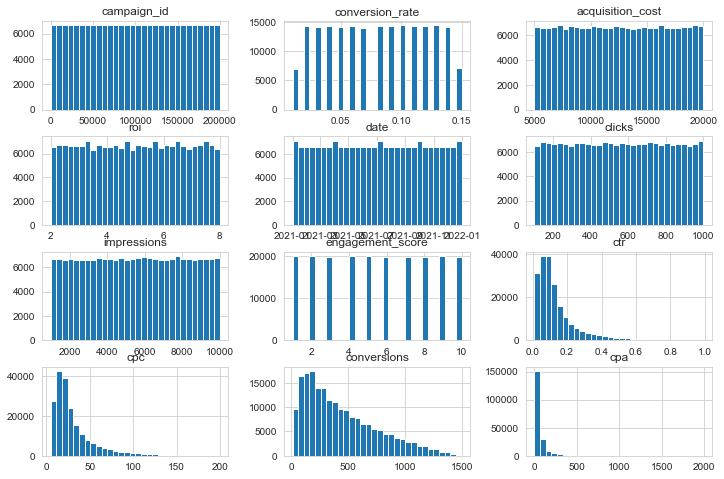


Unique values in company:
['Innovate Industries' 'NexGen Systems' 'Alpha Innovations'
 'DataTech Solutions' 'TechCorp']

Unique values in campaign_type:
['Email' 'Influencer' 'Display' 'Search' 'Social Media']

Unique values in target_audience:
['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']

Unique values in duration:
['30 days' '60 days' '15 days' '45 days']

Unique values in channel_used:
['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']

Unique values in location:
['Chicago' 'New York' 'Los Angeles' 'Miami' 'Houston']

Unique values in customer_segment:
['Health & Wellness' 'Fashionistas' 'Outdoor Adventurers' 'Foodies'
 'Tech Enthusiasts']


In [20]:
# Distribution of numerical features
data.hist(figsize=(12, 8), bins=30)
plt.show()

# Checking unique values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())

## Outlier Detection

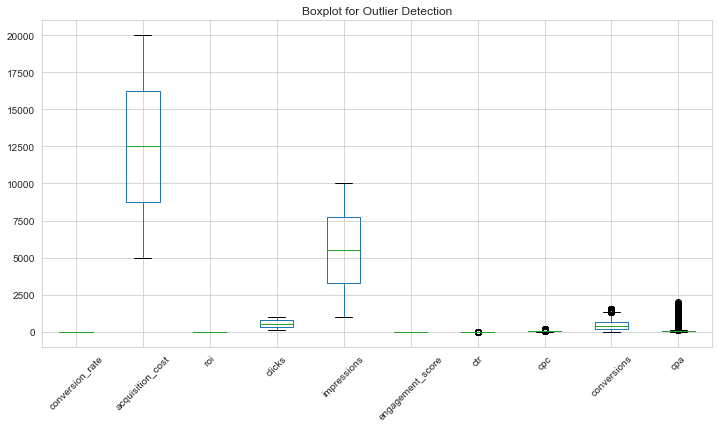

In [21]:
# Boxplot for detecting outliers in numerical columns (excluding campaign_id)
numeric_cols = data.select_dtypes(include=['number']).columns.drop('campaign_id', errors='ignore')
plt.figure(figsize=(12, 6))
data[numeric_cols].boxplot(rot=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

## Bivariate Analysis

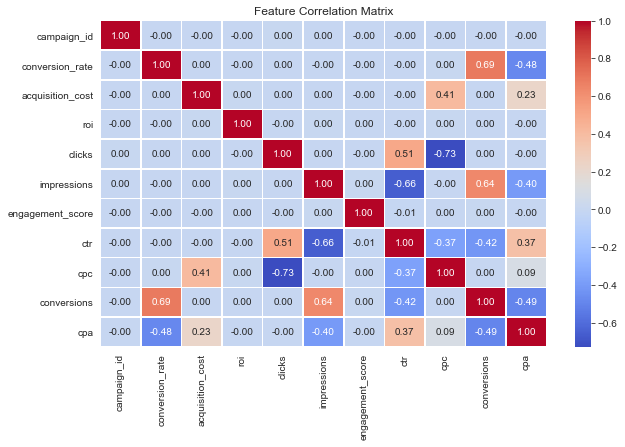

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Visualizations

### Click-Through Rate (CTR), Cost-Per-Click (CPC), and Cost-Per-Acquisition (CPA) Analysis

#### CTR vs Engagement vs Impressions Analysis

<ipython-input-29-cd0481f6addb>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ctr_data[xlabel], rotation=45, ha="right")
<ipython-input-29-cd0481f6addb>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ctr_data[xlabel], rotation=45, ha="right")
<ipython-input-29-cd0481f6addb>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ctr_data[xlabel], rotation=45, ha="right")
<ipython-input-29-cd0481f6addb>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ctr_data[xlabel], rotation=45, ha="right")
<ipython-input-29-cd0481f6addb>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ctr_data[xlabel], rotation=45, ha="right")
<ipython-input-29-cd0481f6addb>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xtick

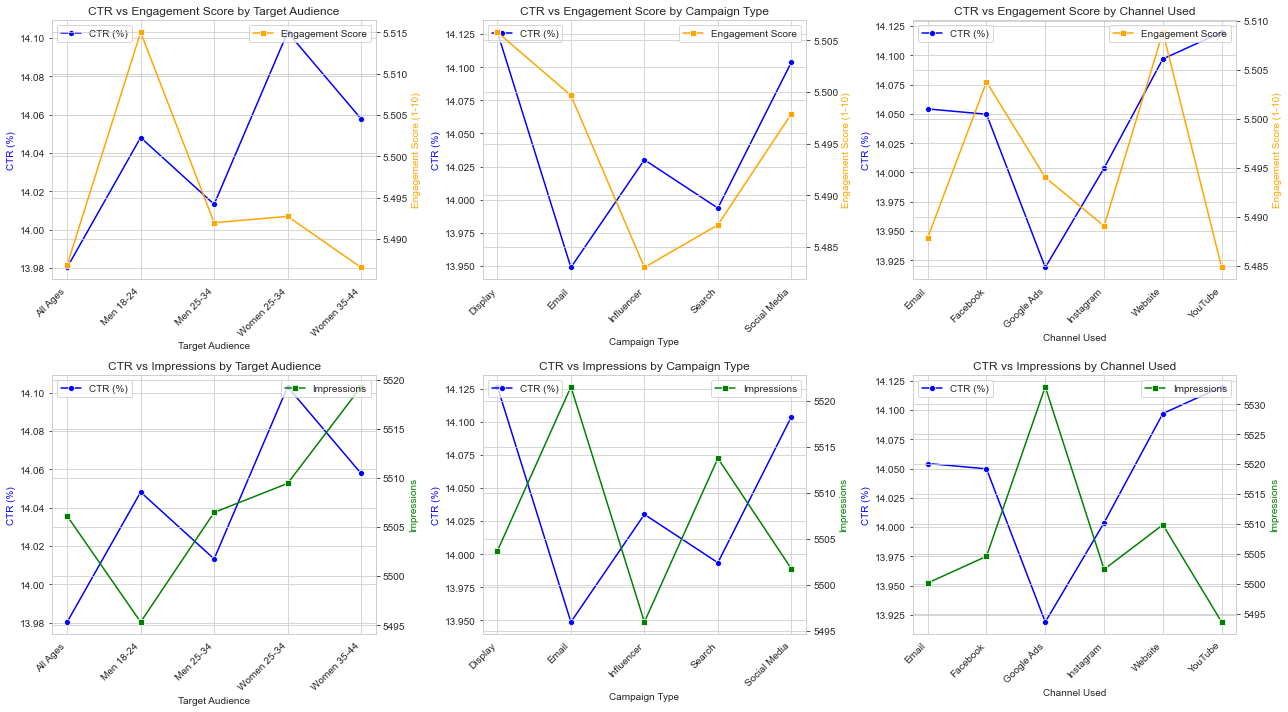

In [29]:
sns.set_style("whitegrid")

# Aggregate CTR, Engagement Score, and Impressions
ctr_by_audience = data.groupby('target_audience', as_index=False).agg({'ctr': 'mean', 'engagement_score': 'mean', 'impressions': 'mean'})
ctr_by_campaign = data.groupby('campaign_type', as_index=False).agg({'ctr': 'mean', 'engagement_score': 'mean', 'impressions': 'mean'})
ctr_by_channel = data.groupby('channel_used', as_index=False).agg({'ctr': 'mean', 'engagement_score': 'mean', 'impressions': 'mean'})

# Convert CTR to percentage
for df in [ctr_by_audience, ctr_by_campaign, ctr_by_channel]:
    df['ctr'] *= 100  # Convert from decimal to percentage

# Define plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

data_list = [ctr_by_audience, ctr_by_campaign, ctr_by_channel]
titles = ["Target Audience", "Campaign Type", "Channel Used"]
xlabels = ["target_audience", "campaign_type", "channel_used"]

# Plot CTR vs Engagement Score (Top Row)
for ax, ctr_data, title, xlabel in zip(axes[0], data_list, titles, xlabels):
    ax1 = sns.lineplot(data=ctr_data, x=xlabel, y='ctr', marker='o', color='b', label="CTR (%)", ax=ax)
    ax2 = ax.twinx()
    sns.lineplot(data=ctr_data, x=xlabel, y='engagement_score', marker='s', color='orange', label="Engagement Score", ax=ax2)

    # Labels and legends
    ax.set_ylabel("CTR (%)", color='b')
    ax2.set_ylabel("Engagement Score (1-10)", color='orange')
    ax.set_xlabel(title)
    ax.set_xticklabels(ctr_data[xlabel], rotation=45, ha="right")
    ax.set_title(f"CTR vs Engagement Score by {title}")
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

# Plot CTR vs Impressions (Bottom Row)
for ax, ctr_data, title, xlabel in zip(axes[1], data_list, titles, xlabels):
    ax1 = sns.lineplot(data=ctr_data, x=xlabel, y='ctr', marker='o', color='b', label="CTR (%)", ax=ax)
    ax2 = ax.twinx()
    sns.lineplot(data=ctr_data, x=xlabel, y='impressions', marker='s', color='g', label="Impressions", ax=ax2)

    # Labels and legends
    ax.set_ylabel("CTR (%)", color='b')
    ax2.set_ylabel("Impressions", color='g')
    ax.set_xlabel(title)
    ax.set_xticklabels(ctr_data[xlabel], rotation=45, ha="right")
    ax.set_title(f"CTR vs Impressions by {title}")
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


#### CPC vs Conversions Analysis

<ipython-input-37-4ff98158197a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cpc_data[xlabel], rotation=45, ha="right")
<ipython-input-37-4ff98158197a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cpc_data[xlabel], rotation=45, ha="right")
<ipython-input-37-4ff98158197a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cpc_data[xlabel], rotation=45, ha="right")
<ipython-input-37-4ff98158197a>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cpc_by_audience['target_audience'], rotation=45, ha="right")


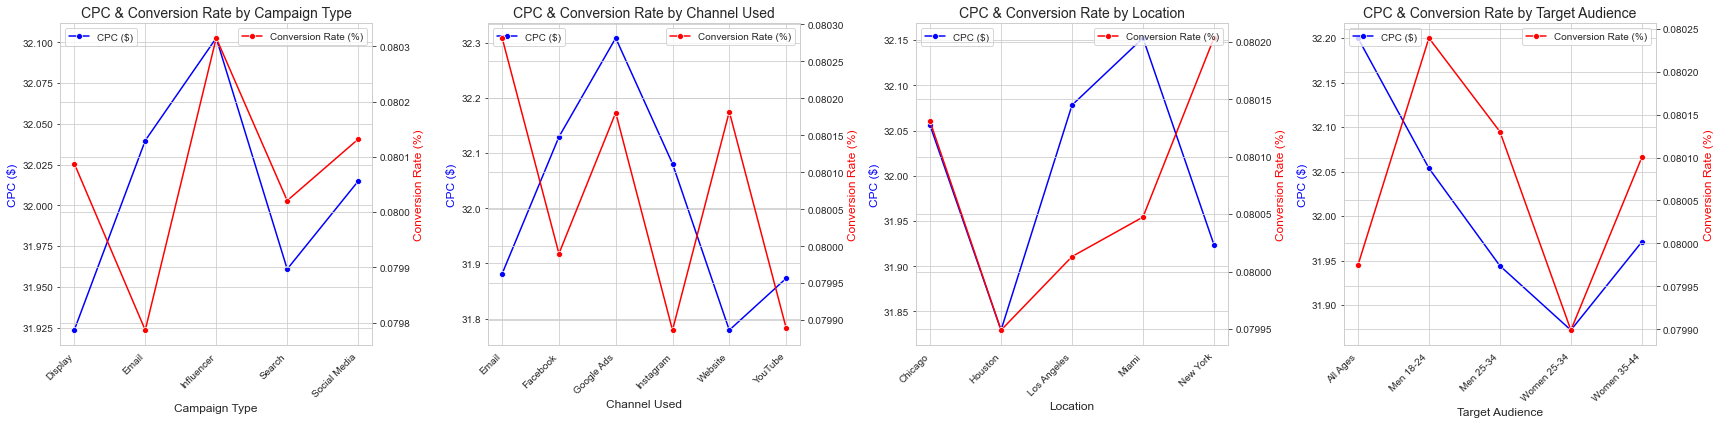

In [37]:
sns.set_style("whitegrid")

# Aggregate data
cpc_by_campaign = data.groupby('campaign_type', as_index=False).agg({'cpc': 'mean', 'conversion_rate': 'mean'})
cpc_by_channel = data.groupby('channel_used', as_index=False).agg({'cpc': 'mean', 'conversion_rate': 'mean'})
cpc_by_location = data.groupby('location', as_index=False).agg({'cpc': 'mean', 'conversion_rate': 'mean'})
cpc_by_audience = data.groupby('target_audience', as_index=False).agg({'cpc': 'mean', 'conversion_rate': 'mean'})

# Define categories
data_list = [cpc_by_campaign, cpc_by_channel, cpc_by_location]
titles = ["Campaign Type", "Channel Used", "Location"]
xlabels = ["campaign_type", "channel_used", "location"]

# Create subplots (3 existing + 1 new chart for Target Audience)
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Single row, 4 columns

# Plot CPC and Conversion Rate on the same chart with twin axes
for ax, cpc_data, title, xlabel in zip(axes[:3], data_list, titles, xlabels):
    ax1 = sns.lineplot(data=cpc_data, x=xlabel, y='cpc', marker='o', color='b', label="CPC ($)", ax=ax)
    ax1.set_ylabel("CPC ($)", fontsize=12, color='b')
    ax1.set_xlabel(title, fontsize=12)
    ax1.set_xticklabels(cpc_data[xlabel], rotation=45, ha="right")
    ax1.set_title(f"CPC & Conversion Rate by {title}", fontsize=14)
    
    # Create twin axis for Conversion Rate
    ax2 = ax.twinx()
    sns.lineplot(data=cpc_data, x=xlabel, y='conversion_rate', marker='o', color='r', label="Conversion Rate (%)", ax=ax2)
    ax2.set_ylabel("Conversion Rate (%)", fontsize=12, color='r')

    # Add legends
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

# NEW CHART for Target Audience
ax_audience = axes[3]
ax1 = sns.lineplot(data=cpc_by_audience, x='target_audience', y='cpc', marker='o', color='b', label="CPC ($)", ax=ax_audience)
ax1.set_ylabel("CPC ($)", fontsize=12, color='b')
ax1.set_xlabel("Target Audience", fontsize=12)
ax1.set_xticklabels(cpc_by_audience['target_audience'], rotation=45, ha="right")
ax1.set_title("CPC & Conversion Rate by Target Audience", fontsize=14)

# Twin axis for Conversion Rate
ax2 = ax_audience.twinx()
sns.lineplot(data=cpc_by_audience, x='target_audience', y='conversion_rate', marker='o', color='r', label="Conversion Rate (%)", ax=ax2)
ax2.set_ylabel("Conversion Rate (%)", fontsize=12, color='r')

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


#### CPA vs ROI vs Conversion Rate Analysis

<ipython-input-38-a52c96397d0d>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cpa_data[xlabel], rotation=30, ha="right", fontsize=8)  # Reduce rotation & font size
<ipython-input-38-a52c96397d0d>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cpa_data[xlabel], rotation=30, ha="right", fontsize=8)  # Reduce rotation & font size
<ipython-input-38-a52c96397d0d>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cpa_data[xlabel], rotation=30, ha="right", fontsize=8)  # Reduce rotation & font size
<ipython-input-38-a52c96397d0d>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cpa_data[xlabel], rotation=30, ha="right", fontsize=8)  # Reduce rotation & font size


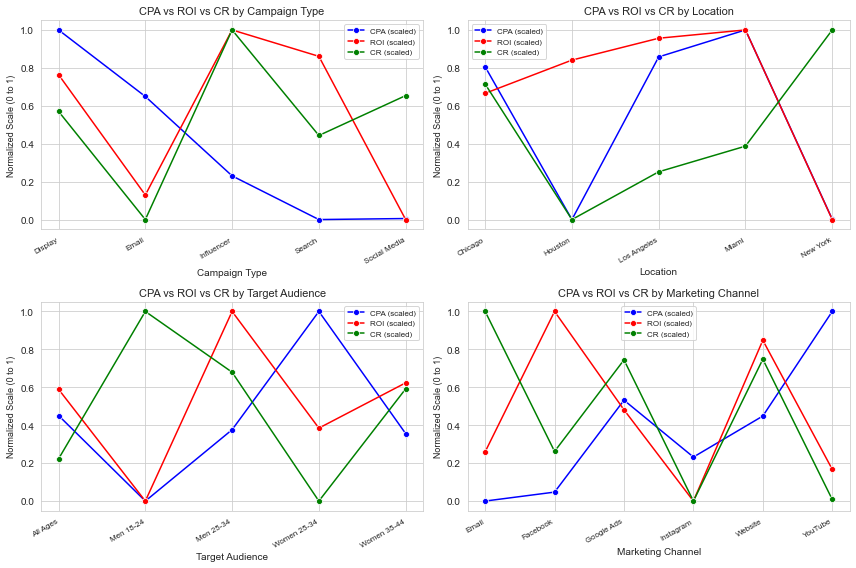

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Aggregating data
cpa_by_campaign = data.groupby('campaign_type', as_index=False).agg({'cpa': 'mean', 'roi': 'mean', 'conversion_rate': 'mean', 'ctr': 'mean'})
cpa_by_location = data.groupby('location', as_index=False).agg({'cpa': 'mean', 'roi': 'mean', 'conversion_rate': 'mean', 'ctr': 'mean'})
cpa_by_audience = data.groupby('target_audience', as_index=False).agg({'cpa': 'mean', 'roi': 'mean', 'conversion_rate': 'mean', 'ctr': 'mean'})
cpa_by_channel = data.groupby('channel_used', as_index=False).agg({'cpa': 'mean', 'roi': 'mean', 'conversion_rate': 'mean', 'ctr': 'mean'})

# Reduce figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Smaller figure size

data_list = [cpa_by_campaign, cpa_by_location, cpa_by_audience, cpa_by_channel]
titles = ["Campaign Type", "Location", "Target Audience", "Marketing Channel"]
xlabels = ["campaign_type", "location", "target_audience", "channel_used"]

def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

for ax, cpa_data, title, xlabel in zip(axes.flatten(), data_list, titles, xlabels):
    # Normalize values
    cpa_data['cpa_norm'] = normalize(cpa_data['cpa'])
    cpa_data['roi_norm'] = normalize(cpa_data['roi'])
    cpa_data['conversion_rate_norm'] = normalize(cpa_data['conversion_rate'])

    # Plot normalized values
    sns.lineplot(data=cpa_data, x=xlabel, y='cpa_norm', marker='o', color='b', label="CPA (scaled)", ax=ax)
    sns.lineplot(data=cpa_data, x=xlabel, y='roi_norm', marker='o', color='r', label="ROI (scaled)", ax=ax)
    sns.lineplot(data=cpa_data, x=xlabel, y='conversion_rate_norm', marker='o', color='g', label="CR (scaled)", ax=ax)

    # Labels and Title
    ax.set_xlabel(title, fontsize=10)
    ax.set_ylabel("Normalized Scale (0 to 1)", fontsize=9)
    ax.set_xticklabels(cpa_data[xlabel], rotation=30, ha="right", fontsize=8)  # Reduce rotation & font size
    ax.set_title(f"CPA vs ROI vs CR by {title}", fontsize=11)

    # Legends
    ax.legend(fontsize=8)

# Adjust layout to reduce spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Reducing vertical & horizontal space

plt.tight_layout()
plt.show()


# INSIGHTS
- Higher engagement scores correlate with higher CTR in some audience segment


- Men aged 18-24 and Social Media Campaigns showed high engagement and CTR alignment

- Higher impressions do not always guarantee a higher CTR.


- Google Ads & Website Channels have high impressions but varied CTR results

- Men aged 18-24 had the highest conversion rate.


- Women 25-34 had a balanced Conversion Date against CPC!

- Influencer Marketing & Search Campaigns delivered the highest ROI and relatively high Conversion Rates


- Display Campaigns had a high conversion rate but relatively lower ROI due to the costs.

- Facebook Ads and Websites offer strong ROI with relatively low CPA.


- Facebook Ads had lower CPA and  better conversion efficiency.

- Los Angeles & Miami generated the highest ROI.


- Houston had lower CPA making it a cost-effective region!

- Men 18-24 had the highest Conversion Rate and low CPC.

- Women 25-34 have a balanced Conversion Rate to CPC ratio.